<div style="width: 100%; clear: both;">
  <div style="float: left; width: 50%;">
    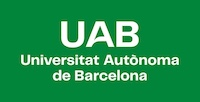
    <p style="margin-top: 10px;">
      <strong>Name:</strong> Loc-Phat Truong<br />
      <strong>Email:</strong> <a href="mailto:LocPhat.Truong@autonoma.cat">LocPhat.Truong@autonoma.cat</a>
    </p>
  </div>
    <div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>University Master's Degree in Computer Vision</b></p>
    <p style="margin: 0; text-align:right;">Reinforcement Learning</p>
    <p style="margin: 0; text-align:right;">Computer Vision Center (CVC)</p>
</div>
</div>


# Task 1: Traditional Graph Learning

## Data loading

The first step to solve this problem is, obviously, to load the data in _numpy_ array or _pandas_ dataframe.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
basepath = "./data"
basepath_FA = os.path.join(basepath, "FA")
basepath_GM = os.path.join(basepath, "GM")
basepath_RS = os.path.join(basepath, "RS")

According to the labels, people in this cohort are classified in four groups:
- **Healthy volunteers** (controls, _mstype = -1_): People without MS.
- **Relapsing remitting MS** (RRMS, _mstype = 0_) is a type of MS where you have relapses (symptoms getting worse) followed by recovery (that's when it's “remitting”). Your disability doesn't get worse between relapses but after each relapse it can end up worse than before.
- **Secondary progressive MS** (SPMS, _mstype = 1_) follows the initial course of relapsing-remitting MS (RRMS). Some people who are diagnosed with RRMS eventually go on to have a secondary progressive course, in which neurologic function worsens over time and disability increases.
- **Primary progressive MS** (PPMS, _mstype = 2_). If you have PPMS, you will experience gradually worsening neurologic symptoms and an accumulation of disability. You will not have relapses, or attacks, early in the disease course.

In [3]:
CT_CONTROL = -1
CT_RRMS = 0
CT_SPMS = 1
CT_PPMS = 2

In [4]:
df = pd.read_csv(os.path.join(basepath, "demographics.csv"))
df

,id,mstype
0,0,1
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
160,160,-1
161,161,-1
162,162,-1
163,163,-1


In [5]:
target = df["mstype"].values
target

array([ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  1,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In order to simplify the problem, we group all types of people into:
- **Healthy volunteers** (HV), mstype == -1
- **People with MS** (pwMS), mstype == 0, 1, 2

In [6]:
# Transform target to 0 -> HV; 1 -> MS
target = target + 1
target[target > 1] = 1
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Check the number of subjects in each category:

In [7]:
pd.Series(target).value_counts()

1    147
0     18
Name: count, dtype: int64

Create a list with all input filenames, using the ID of each subject.

In [8]:
filenames = ["{:04d}.csv".format(x) for x in df["id"]]
filenames

['0000.csv',
 '0001.csv',
 '0002.csv',
 '0003.csv',
 '0004.csv',
 '0005.csv',
 '0006.csv',
 '0007.csv',
 '0008.csv',
 '0009.csv',
 '0010.csv',
 '0011.csv',
 '0012.csv',
 '0013.csv',
 '0014.csv',
 '0015.csv',
 '0016.csv',
 '0017.csv',
 '0018.csv',
 '0019.csv',
 '0020.csv',
 '0021.csv',
 '0022.csv',
 '0023.csv',
 '0024.csv',
 '0025.csv',
 '0026.csv',
 '0027.csv',
 '0028.csv',
 '0029.csv',
 '0030.csv',
 '0031.csv',
 '0032.csv',
 '0033.csv',
 '0034.csv',
 '0035.csv',
 '0036.csv',
 '0037.csv',
 '0038.csv',
 '0039.csv',
 '0040.csv',
 '0041.csv',
 '0042.csv',
 '0043.csv',
 '0044.csv',
 '0045.csv',
 '0046.csv',
 '0047.csv',
 '0048.csv',
 '0049.csv',
 '0050.csv',
 '0051.csv',
 '0052.csv',
 '0053.csv',
 '0054.csv',
 '0055.csv',
 '0056.csv',
 '0057.csv',
 '0058.csv',
 '0059.csv',
 '0060.csv',
 '0061.csv',
 '0062.csv',
 '0063.csv',
 '0064.csv',
 '0065.csv',
 '0066.csv',
 '0067.csv',
 '0068.csv',
 '0069.csv',
 '0070.csv',
 '0071.csv',
 '0072.csv',
 '0073.csv',
 '0074.csv',
 '0075.csv',
 '0076.csv',

The following lines of code will create a **4D _numpy_ array** (`data`) to store the whole dataset:
- The shape of the array should be: _(num_subjects, num_nodes, num_nodes, num_matrices)_

where:
- "num_subjects" is 165,
- "nun_nodes" is 76 (parcellation scheme)
- "num_matrices" is 3 (DTI, GM and rs-fMRI)

In [9]:
data = np.zeros(shape=(len(filenames), 76, 76, 3))

for i, filename in enumerate(filenames):
    df = pd.read_csv(os.path.join(basepath_FA, filename), header=None)
    data[i,:,:,0] = df.values
    
    df = pd.read_csv(os.path.join(basepath_GM, filename), header=None)
    data[i,:,:,1] = df.values
    
    df = pd.read_csv(os.path.join(basepath_RS, filename), header=None)
    data[i,:,:,2] = df.values

print(data.shape)

(165, 76, 76, 3)


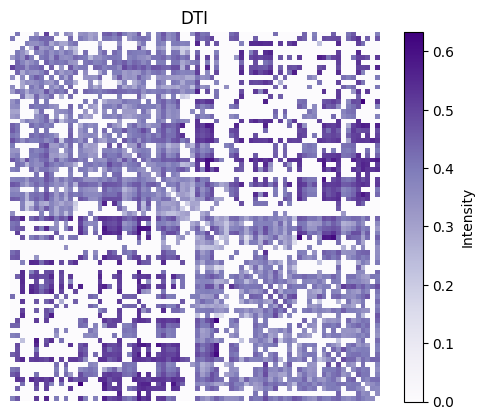

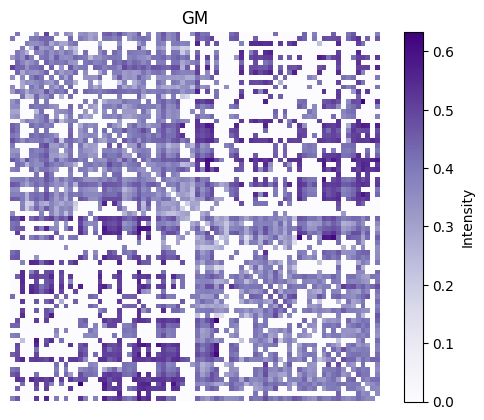

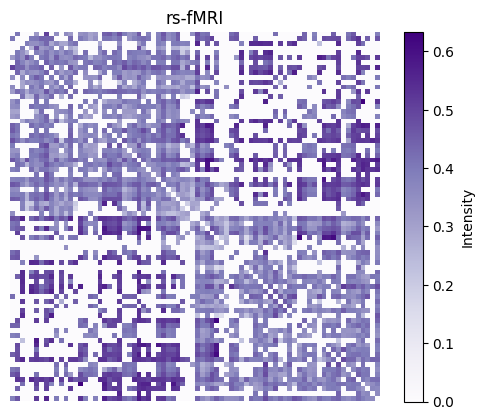

In [10]:
import matplotlib.pyplot as plt

modalities = ["DTI", "GM", "rs-fMRI"]

for modality in modalities:
    plt.imshow(data[0, :, :, 0], cmap='Purples')  # or another colormap
    plt.colorbar(label='Intensity')
    plt.title(modality)
    plt.axis('off')  # Optional: hide axes
    plt.show()


Check quantiles and % of pwMS

In [11]:
print("QUANTILES")
for q in np.linspace(0, 1, 11):
    print("{:.2f} -> {:.4f}".format(q, np.quantile(data[:, :, :, :], q)))

QUANTILES
0.00 -> 0.0000
0.10 -> 0.0000
0.20 -> 0.0122
0.30 -> 0.0305
0.40 -> 0.0615
0.50 -> 0.1170
0.60 -> 0.2123
0.70 -> 0.3241
0.80 -> 0.4037
0.90 -> 0.4767
1.00 -> 1.0000


In [12]:
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))

% of pwMS: 0.8909


## 1. Node Embedding
The node embedding is a column that contains the following features: (constant of 1, degree, weighted degree, betweenness, closeness). I added a constant of 1 as a bias value.

In [14]:
from tqdm import tqdm
import networkx as nx
def extract_graph_features(adj_matrix, threshold=0.0):
    adj = adj_matrix.copy()
    adj[adj < threshold] = 0
    G = nx.from_numpy_array(adj, create_using=nx.Graph)

    degree = dict(G.degree(weight=None))
    weighted_degree = dict(G.degree(weight='weight'))
    betweenness = nx.betweenness_centrality(G, weight='weight', normalized=True)
    closeness = nx.closeness_centrality(G, distance='weight')

    features = []
    for node in G.nodes:
        features.append([
            degree[node],
            weighted_degree[node],
            betweenness[node],
            closeness[node]
        ])
    
    return np.array(features)  # (76, 4)

def feature(data):
    subject_feats = []

    for ch in range(3):  # for SC, GM, fMRI
        adj = data[:, :, ch]
        feats = extract_graph_features(adj)  # (76, 4)
        subject_feats.append(feats)

    # Concatenate features from all 3 matrices → (76, 12)
    subject_feats = np.concatenate(subject_feats, axis=1)
    subject_feats = np.concatenate([np.ones((subject_feats.shape[0],1)), subject_feats], axis=1)

    return subject_feats  # shape: (76, 13)

## 2. Data Augmentation
* Data Augmentation by flipping regions

In [19]:
def augment_data(data):
    flipped = data.copy()
    permutations = [
        [0 , 45], [1 , 46], [2 , 47], [3 , 48], [4 , 49], [5 , 50], [6 , 51],
        [7 , 52], [8 , 53], [9 , 54], [10 , 55], [11 , 56], [12 , 57], [13 , 58],
        [14 , 59], [15 , 60], [16 , 61], [17 , 62], [18 , 63], [19 , 64], [20 , 65],
        [21 , 66], [22 , 67], [23 , 68], [24 , 69], [25 , 70], [26 , 71], [27 , 72],
        [28 , 73], [29 , 74], [30 , 75], [31 , 38], [32 , 39], [33 , 40], [34 , 41],
        [35 , 42], [36 , 43], [37 , 44]
    ]
    for i, j in permutations:
        # Swap rows
        flipped[:, [i, j], :, :] = data[:, [j, i], :, :]
        # Swap columns
        flipped[:, :, [i, j], :] = data[:, :, [j, i], :]
    return flipped


## 3. Dataset

In [13]:
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
import numpy as np

def normalize_features(features):
    # This is a standardization that normalize the node features by its own mean and std across the training dataset
    bias = features[:, :1]  # keep bias term as-is
    to_normalize = features[:, 1:]

    scaler = StandardScaler()
    normalized = scaler.fit_transform(to_normalize)

    return np.concatenate([bias, normalized], axis=1)

/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/libpyg.so: undefined symbol: _ZNK3c105Error4whatEv
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c106detail14torchCheckFailEPKcS2_jRKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home

In [ ]:
# Feature extraction
def extract_features(X):
    graph_feats = []
    for i in range(X.shape[0]):
        f = feature(X[i])             # (76, 13)
        f = normalize_features(f)     # (76, 13)
        f = f.mean(axis=0)            # (13,)
        graph_feats.append(f)
    return np.stack(graph_feats)       # (N, 13)

## 4. Traditional Supervised Learning - RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from tqdm import tqdm


skf = StratifiedKFold(n_splits=10)

preds = np.zeros(data.shape[0])
fold = 0

for train_index, test_index in skf.split(data, target):
    fold += 1
    print(f"\nFold: {fold}")

    # Split dataset
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Augmentation (hemisphere flipping)
    augmented_X_train = augment_data(X_train)
    X_train = np.concatenate([X_train, augmented_X_train], axis=0)
    y_train = np.concatenate([y_train, y_train], axis=0)

    prop_train = np.mean(y_train)
    prop_test = np.mean(y_test)
    print("Train set size     :", X_train.shape)
    print("Test set size      :", X_test.shape)
    print(f"Train set % of pwMS: {prop_train:.4f} ({y_train.sum()})")
    print(f"Test set % of pwMS : {prop_test:.4f} ({y_test.sum()})")

    X_train_feats = extract_features(X_train)
    X_test_feats = extract_features(X_test)

    # Train a traditional ML classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_feats, y_train)

    # Predict probabilities for AUC
    y_probs = clf.predict_proba(X_test_feats)[:, 1]
    preds[test_index] = y_probs

    # Evaluate
    auc_roc = roc_auc_score(y_test, y_probs)
    print(f"Test AUC: {auc_roc:.4f}")


Fold: 1
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)
Test AUC: 0.5167

Fold: 2
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)
Test AUC: 0.3833

Fold: 3
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)
Test AUC: 0.5167

Fold: 4
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)
Test AUC: 0.3333

Fold: 5
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)
Test AUC: 0.6000

Fold: 6
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (264)
Test set % of pwMS : 0.9375 (15)
Test AUC:

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
auc_roc = roc_auc_score(target, preds)
auc_pr = average_precision_score(target, preds)
    
best_acc = 0
best_th = 0
for th in preds:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th
        
print("")
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))
print("AUC ROC  : {:.4f}".format(auc_roc))
print("AUC PR   : {:.4f}".format(auc_pr))
print("ACC      : {:.4f}".format(best_acc))


% of pwMS: 0.8909
AUC ROC  : 0.4898
AUC PR   : 0.9047
ACC      : 0.8909


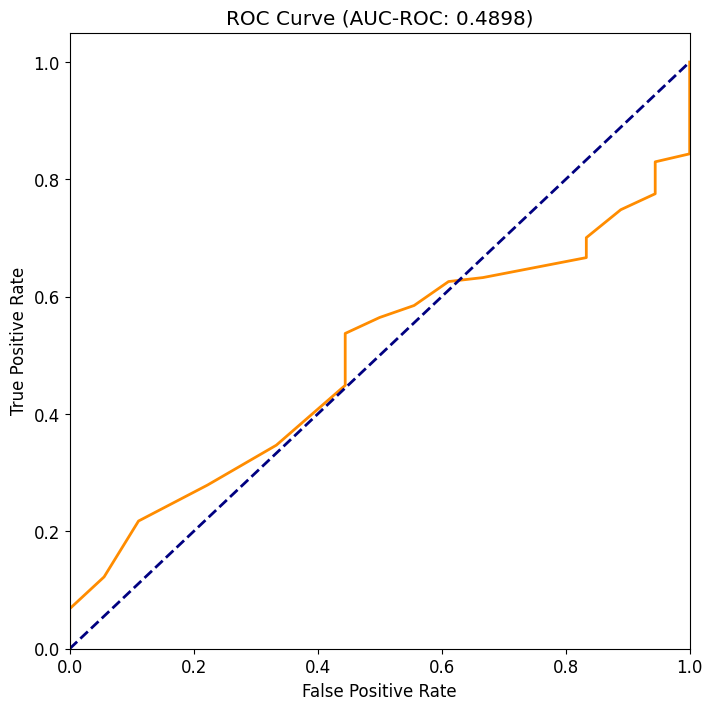

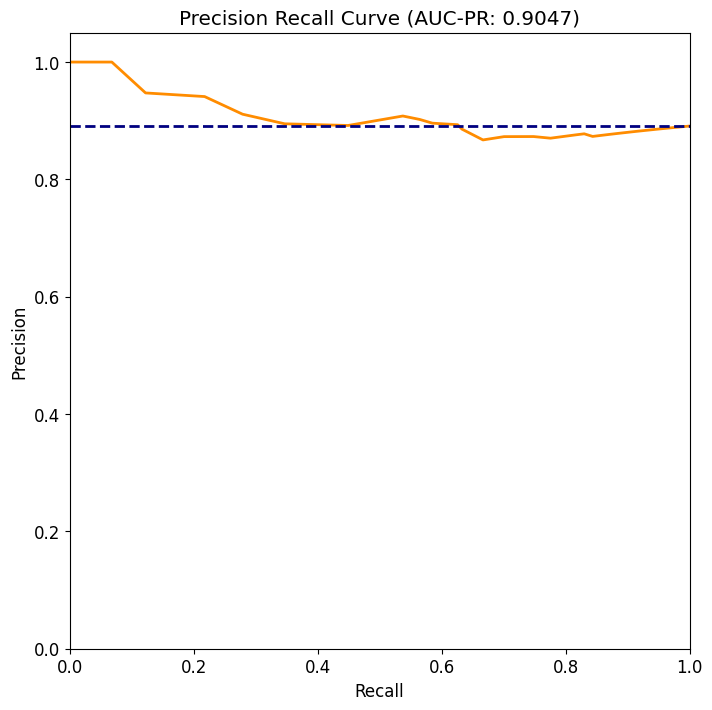

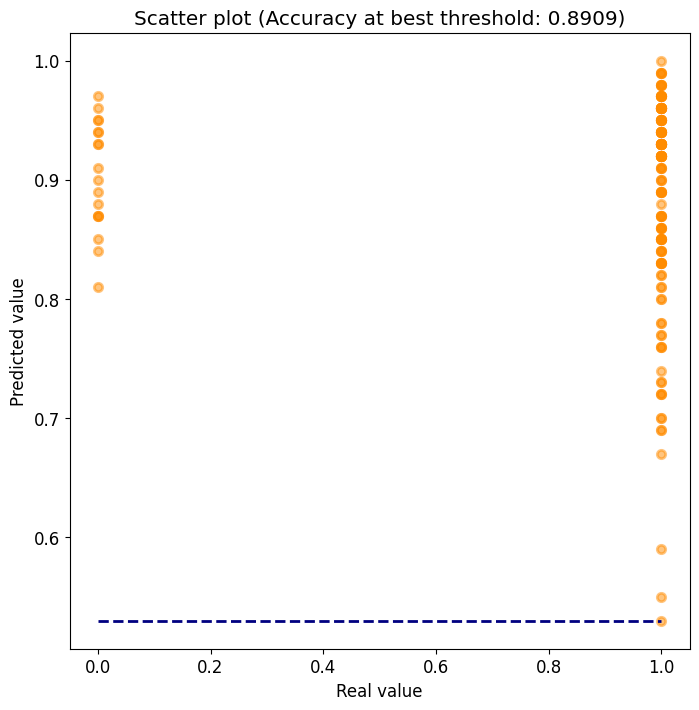

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12


# compute AUC-ROC and ROC curve
auc_roc = roc_auc_score(target, preds)
fpr, tpr, ths = roc_curve(target, preds)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC-ROC: {:.4f})".format(auc_roc))
plt.show()

# Compute AUC-PR
auc_pr = average_precision_score(target, preds)
prec, recall, ths = precision_recall_curve(target, preds)

plt.figure()
lw = 2
plt.plot(recall, prec, color="darkorange", lw=lw)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve (AUC-PR: {:.4f})".format(auc_pr))
plt.show()

# Compute ACC and threshold
best_acc = 0
best_th = 0
for th in ths:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th

plt.figure()
plt.scatter(target, preds, alpha=0.5, color="darkorange", lw=lw)
plt.plot([0, 1], [best_th, best_th], color='navy', lw=lw, linestyle='--')
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Scatter plot (Accuracy at best threshold: {:.4f})".format(best_acc))
plt.show()

Comments:
* The traditional supervised learning method works quite bad in this case. The model almost predicts randomly.

# Task 2: Graph Convolutional Network

## 1. Dataset - Creating the data structures from adjacency matrices

The `array_to_graph` function creates a [Data](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.Data.html) structure from the DTI, GM and rs-fMRI adjacency matrices for each subject in the dataset.

The **input** parameter `data` should be an `np.array` of shape (76, 76, 3), where each adjacency matrix is stored at _(:,:,i)_.

The **output** is `Data` object that contains a pseudo-graph, since edges from every layer are collapsed into this pseudo-graph. Thus, it is an extremely dense graph (probably, all possible edges exist in these graphs!).

In [25]:
def array_to_graph(data, y, th=0.0):
    num_nodes = data.shape[0]
    node_dim = 1
    
    edge_index = []
    edge_weight = []
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                if data[i, j, 0] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 0])
                
                if data[i, j, 1] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 1])
                
                if data[i, j, 2] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 2])
        
    y = torch.tensor([int(y)], dtype=torch.long)
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    x = torch.tensor(normalize_features(feature(data)), dtype=torch.float)
    # x = torch.tensor(np.ones(shape=(num_nodes, node_dim)), dtype=torch.float)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    data = Data(x=x, edge_index=edge_index.t().contiguous(), edge_weight=edge_weight, y=y)
    
    return data

## 2. Defining the Graph Convolutional Network (GCN) and training

The `GCN` class defines:
1. The class constructor
2. The `forward` method defines the computation performed at every call.

In [28]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(13, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 128)
        self.lin1 = torch.nn.Linear(128, 64)
        self.lin2 = torch.nn.Linear(64, 16)
        self.lin3 = torch.nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, edge_weight, batch = data.x, data.edge_index, data.edge_weight, data.batch
        
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        # x = self.conv3(x, edge_index, edge_weight)
        # x = F.relu(x)
        # x = self.conv4(x, edge_index, edge_weight)
        # x = F.relu(x)
        # x = self.conv5(x, edge_index, edge_weight)
        # x = F.relu(x)
        x = global_max_pool(x, batch)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)

        return x

In [29]:
device = torch.device('cuda')

This is the main training loop, where:
1. We define the $k$-fold cross-validation (`StratifiedKFold`)
2. For each fold:
  - Create the model, optimizer, and loss function.
  - Load the train dataset in `DataLoader` and define the batches.
  - Execute the forward and backward steps
3. Load the test dataset in `DataLoader` and define the batches.
4. Test the model and compute the performance metrics.

In [30]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

skf = StratifiedKFold(n_splits=10)

NUM_EPOCHS = 20
preds = np.zeros(data.shape[0])
fold = 0

for train_index, test_index in skf.split(data, target):
    fold += 1
    print("Fold: {}".format(fold))

    # split dataset
    
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Augmentation
    augmented_X_train = augment_data(X_train)
    X_train = np.concatenate([X_train, augmented_X_train], axis=0)
    y_train = np.concatenate([y_train, y_train], axis=0)
    
    prop_train = np.where(y_train == 1)[0].shape[0] / y_train.shape[0]
    prop_test = np.where(y_test == 1)[0].shape[0] / y_test.shape[0]
    print("Train set size     : {}".format(X_train.shape))
    print("Test set size      : {}".format(X_test.shape))
    print("Train set % of pwMS: {:.4f} ({})".format(prop_train, y_train.sum()))
    print("Test set % of pwMS : {:.4f} ({})".format(prop_test, y_test.sum()))

    # list of Data structures (one for each subject)
    train_graphs = []
    for i in tqdm(range(X_train.shape[0])):
        g = array_to_graph(X_train[i], y_train[i])
        train_graphs.append(g)
        
    test_graphs = []
    for i in tqdm(range(X_test.shape[0])):
        g = array_to_graph(X_test[i], y_test[i])
        test_graphs.append(g)

    # create the model
    model = GCN()
    model = model.to(device)
    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # loss function
    loss_fn = torch.nn.BCEWithLogitsLoss()

    # train function
    def train():
        model.train()
        
        train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)

        loss_all = 0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            output = model(batch)
            label = batch.y
            label = F.one_hot(label, num_classes=2)
            label = label.type(torch.FloatTensor)
            label = label.to(device)
            loss = loss_fn(output, label)
            loss.backward()
            loss_all += batch.num_graphs * loss.item()
            optimizer.step()

        return loss_all / len(train_graphs)

    # train for N epochs
    for epoch in range(NUM_EPOCHS):
        loss_value = train()
        print("Train loss at epoch {}: {:.4f}".format(epoch + 1, loss_value))

    # test phase 
    test_loader = DataLoader(test_graphs, batch_size=len(test_graphs), shuffle=False)
    
    for batch in test_loader:
        batch = batch.to(device)
        test_preds = F.softmax(model(batch), dim=1).cpu().detach().numpy()
    
    test_preds = test_preds[:, 1]
    preds[test_index] = test_preds
    
    auc_roc = roc_auc_score(y_test, test_preds)
    print("Test AUC: {:.2f}".format(auc_roc))

Fold: 1
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:07<00:00,  2.26it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6947
Train loss at epoch 2: 0.6048
Train loss at epoch 3: 0.4358
Train loss at epoch 4: 0.3513
Train loss at epoch 5: 0.3416
Train loss at epoch 6: 0.3379
Train loss at epoch 7: 0.3399
Train loss at epoch 8: 0.3387
Train loss at epoch 9: 0.3385
Train loss at epoch 10: 0.3374
Train loss at epoch 11: 0.3410
Train loss at epoch 12: 0.3375
Train loss at epoch 13: 0.3386
Train loss at epoch 14: 0.3367
Train loss at epoch 15: 0.3384
Train loss at epoch 16: 0.3414
Train loss at epoch 17: 0.3388
Train loss at epoch 18: 0.3395
Train loss at epoch 19: 0.3339
Train loss at epoch 20: 0.3381
Test AUC: 0.70
Fold: 2
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:07<00:00,  2.22it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6615
Train loss at epoch 2: 0.6469
Train loss at epoch 3: 0.6216
Train loss at epoch 4: 0.5598
Train loss at epoch 5: 0.4425
Train loss at epoch 6: 0.3505
Train loss at epoch 7: 0.3431
Train loss at epoch 8: 0.3388
Train loss at epoch 9: 0.3382
Train loss at epoch 10: 0.3421
Train loss at epoch 11: 0.3434
Train loss at epoch 12: 0.3373
Train loss at epoch 13: 0.3384
Train loss at epoch 14: 0.3382
Train loss at epoch 15: 0.3372
Train loss at epoch 16: 0.3371
Train loss at epoch 17: 0.3374
Train loss at epoch 18: 0.3361
Train loss at epoch 19: 0.3382
Train loss at epoch 20: 0.3371
Test AUC: 0.80
Fold: 3
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:07<00:00,  2.13it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6729
Train loss at epoch 2: 0.6215
Train loss at epoch 3: 0.5022
Train loss at epoch 4: 0.3667
Train loss at epoch 5: 0.3751
Train loss at epoch 6: 0.3462
Train loss at epoch 7: 0.3423
Train loss at epoch 8: 0.3369
Train loss at epoch 9: 0.3365
Train loss at epoch 10: 0.3363
Train loss at epoch 11: 0.3361
Train loss at epoch 12: 0.3366
Train loss at epoch 13: 0.3350
Train loss at epoch 14: 0.3357
Train loss at epoch 15: 0.3352
Train loss at epoch 16: 0.3357
Train loss at epoch 17: 0.3365
Train loss at epoch 18: 0.3351
Train loss at epoch 19: 0.3370
Train loss at epoch 20: 0.3351
Test AUC: 0.43
Fold: 4
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:07<00:00,  2.23it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6571
Train loss at epoch 2: 0.6270
Train loss at epoch 3: 0.5675
Train loss at epoch 4: 0.4533
Train loss at epoch 5: 0.3475
Train loss at epoch 6: 0.3522
Train loss at epoch 7: 0.3403
Train loss at epoch 8: 0.3372
Train loss at epoch 9: 0.3371
Train loss at epoch 10: 0.3360
Train loss at epoch 11: 0.3376
Train loss at epoch 12: 0.3356
Train loss at epoch 13: 0.3366
Train loss at epoch 14: 0.3353
Train loss at epoch 15: 0.3363
Train loss at epoch 16: 0.3347
Train loss at epoch 17: 0.3360
Train loss at epoch 18: 0.3351
Train loss at epoch 19: 0.3348
Train loss at epoch 20: 0.3361
Test AUC: 0.53
Fold: 5
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:07<00:00,  2.22it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6673
Train loss at epoch 2: 0.6066
Train loss at epoch 3: 0.4816
Train loss at epoch 4: 0.3616
Train loss at epoch 5: 0.3528
Train loss at epoch 6: 0.3416
Train loss at epoch 7: 0.3421
Train loss at epoch 8: 0.3399
Train loss at epoch 9: 0.3399
Train loss at epoch 10: 0.3374
Train loss at epoch 11: 0.3389
Train loss at epoch 12: 0.3384
Train loss at epoch 13: 0.3379
Train loss at epoch 14: 0.3369
Train loss at epoch 15: 0.3390
Train loss at epoch 16: 0.3369
Train loss at epoch 17: 0.3362
Train loss at epoch 18: 0.3358
Train loss at epoch 19: 0.3367
Train loss at epoch 20: 0.3356
Test AUC: 0.80
Fold: 6
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (264)
Test set % of pwMS : 0.9375 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.26it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6373
Train loss at epoch 2: 0.6105
Train loss at epoch 3: 0.5422
Train loss at epoch 4: 0.4147
Train loss at epoch 5: 0.3634
Train loss at epoch 6: 0.3545
Train loss at epoch 7: 0.3560
Train loss at epoch 8: 0.3530
Train loss at epoch 9: 0.3495
Train loss at epoch 10: 0.3495
Train loss at epoch 11: 0.3525
Train loss at epoch 12: 0.3488
Train loss at epoch 13: 0.3494
Train loss at epoch 14: 0.3503
Train loss at epoch 15: 0.3503
Train loss at epoch 16: 0.3490
Train loss at epoch 17: 0.3484
Train loss at epoch 18: 0.3483
Train loss at epoch 19: 0.3487
Train loss at epoch 20: 0.3485
Test AUC: 0.60
Fold: 7
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (264)
Test set % of pwMS : 0.9375 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.26it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6505
Train loss at epoch 2: 0.6280
Train loss at epoch 3: 0.5700
Train loss at epoch 4: 0.4391
Train loss at epoch 5: 0.3501
Train loss at epoch 6: 0.3636
Train loss at epoch 7: 0.3503
Train loss at epoch 8: 0.3500
Train loss at epoch 9: 0.3492
Train loss at epoch 10: 0.3501
Train loss at epoch 11: 0.3492
Train loss at epoch 12: 0.3485
Train loss at epoch 13: 0.3485
Train loss at epoch 14: 0.3485
Train loss at epoch 15: 0.3497
Train loss at epoch 16: 0.3488
Train loss at epoch 17: 0.3481
Train loss at epoch 18: 0.3472
Train loss at epoch 19: 0.3494
Train loss at epoch 20: 0.3477
Test AUC: 0.67
Fold: 8
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (266)
Test set % of pwMS : 0.8750 (14)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.22it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6008
Train loss at epoch 2: 0.5499
Train loss at epoch 3: 0.4483
Train loss at epoch 4: 0.3548
Train loss at epoch 5: 0.3504
Train loss at epoch 6: 0.3376
Train loss at epoch 7: 0.3378
Train loss at epoch 8: 0.3373
Train loss at epoch 9: 0.3367
Train loss at epoch 10: 0.3392
Train loss at epoch 11: 0.3394
Train loss at epoch 12: 0.3364
Train loss at epoch 13: 0.3365
Train loss at epoch 14: 0.3360
Train loss at epoch 15: 0.3356
Train loss at epoch 16: 0.3383
Train loss at epoch 17: 0.3387
Train loss at epoch 18: 0.3374
Train loss at epoch 19: 0.3353
Train loss at epoch 20: 0.3352
Test AUC: 1.00
Fold: 9
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (266)
Test set % of pwMS : 0.8750 (14)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.11it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.7269
Train loss at epoch 2: 0.6549
Train loss at epoch 3: 0.5165
Train loss at epoch 4: 0.3567
Train loss at epoch 5: 0.3549
Train loss at epoch 6: 0.3428
Train loss at epoch 7: 0.3401
Train loss at epoch 8: 0.3369
Train loss at epoch 9: 0.3419
Train loss at epoch 10: 0.3411
Train loss at epoch 11: 0.3401
Train loss at epoch 12: 0.3348
Train loss at epoch 13: 0.3373
Train loss at epoch 14: 0.3383
Train loss at epoch 15: 0.3363
Train loss at epoch 16: 0.3366
Train loss at epoch 17: 0.3369
Train loss at epoch 18: 0.3363
Train loss at epoch 19: 0.3369
Train loss at epoch 20: 0.3349
Test AUC: 1.00
Fold: 10
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (266)
Test set % of pwMS : 0.8750 (14)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6625
Train loss at epoch 2: 0.6216
Train loss at epoch 3: 0.5364
Train loss at epoch 4: 0.3980
Train loss at epoch 5: 0.3376
Train loss at epoch 6: 0.3523
Train loss at epoch 7: 0.3343
Train loss at epoch 8: 0.3377
Train loss at epoch 9: 0.3362
Train loss at epoch 10: 0.3357
Train loss at epoch 11: 0.3352
Train loss at epoch 12: 0.3372
Train loss at epoch 13: 0.3352
Train loss at epoch 14: 0.3350
Train loss at epoch 15: 0.3344
Train loss at epoch 16: 0.3362
Train loss at epoch 17: 0.3356
Train loss at epoch 18: 0.3348
Train loss at epoch 19: 0.3341
Train loss at epoch 20: 0.3338
Test AUC: 0.71


## 3. Result
Finally, we compute the **AUC-ROC**, **AUC-PR** and **accuracy** metrics to test the performance of the model.

In [31]:
auc_roc = roc_auc_score(target, preds)
auc_pr = average_precision_score(target, preds)
    
best_acc = 0
best_th = 0
for th in preds:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th
        
print("")
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))
print("AUC ROC  : {:.4f}".format(auc_roc))
print("AUC PR   : {:.4f}".format(auc_pr))
print("ACC      : {:.4f}".format(best_acc))


% of pwMS: 0.8909
AUC ROC  : 0.5998
AUC PR   : 0.9301
ACC      : 0.8909


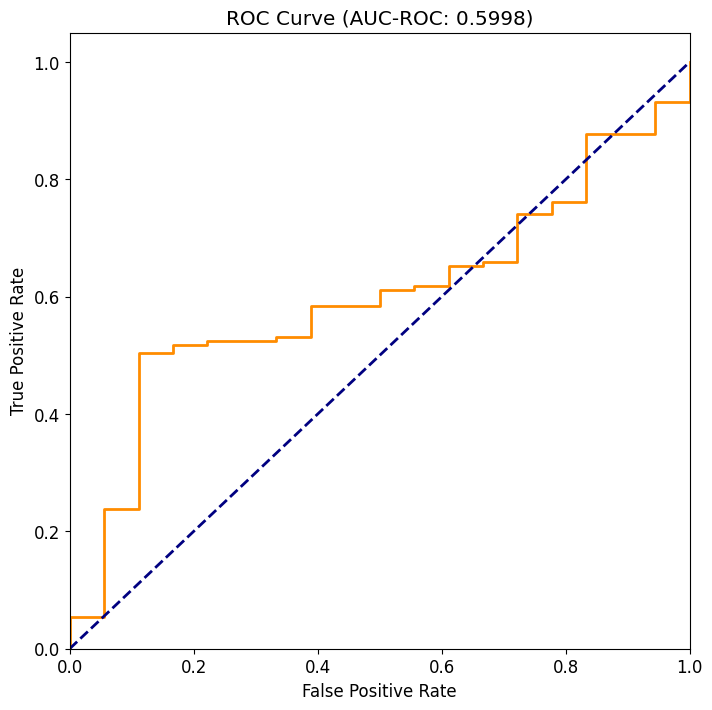

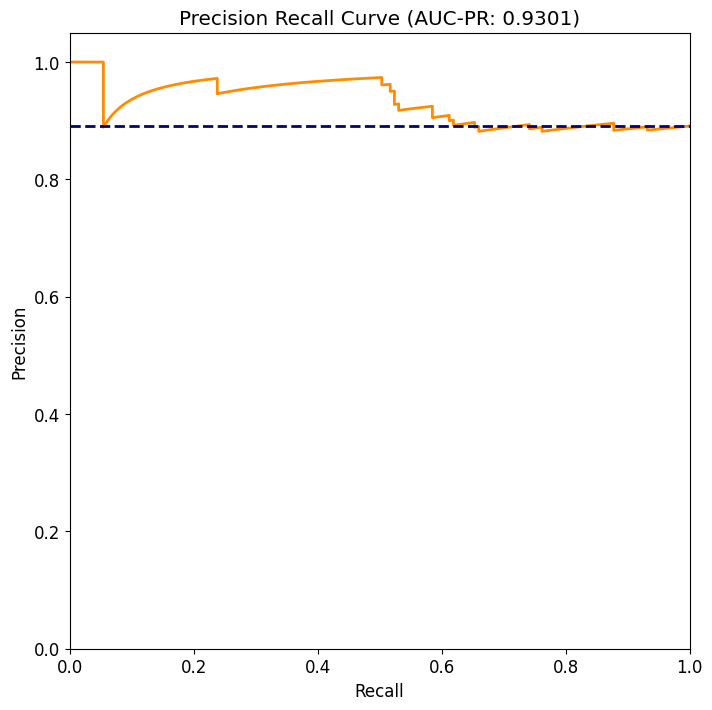

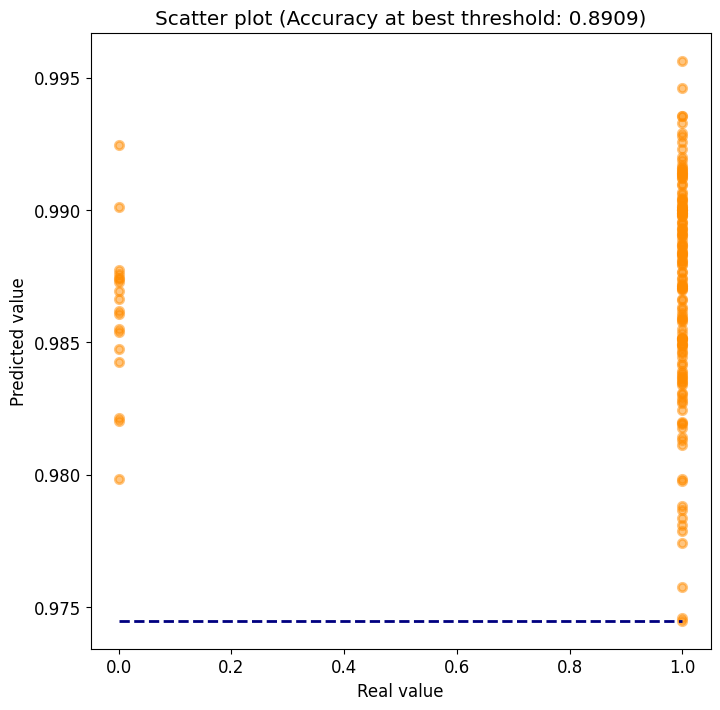

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12


# compute AUC-ROC and ROC curve
auc_roc = roc_auc_score(target, preds)
fpr, tpr, ths = roc_curve(target, preds)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC-ROC: {:.4f})".format(auc_roc))
plt.show()

# Compute AUC-PR
auc_pr = average_precision_score(target, preds)
prec, recall, ths = precision_recall_curve(target, preds)

plt.figure()
lw = 2
plt.plot(recall, prec, color="darkorange", lw=lw)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve (AUC-PR: {:.4f})".format(auc_pr))
plt.show()

# Compute ACC and threshold
best_acc = 0
best_th = 0
for th in ths:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th

plt.figure()
plt.scatter(target, preds, alpha=0.5, color="darkorange", lw=lw)
plt.plot([0, 1], [best_th, best_th], color='navy', lw=lw, linestyle='--')
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Scatter plot (Accuracy at best threshold: {:.4f})".format(best_acc))
plt.show()

Comments:
* A lot of improvement when using GCN compared to traditional random forest
    * ROC-AUC : ~10% from 48.9% to 59.98%
    * PR-AUC: ~3% from 90.47% to 93.01%

# Task 3: Graph Attention Network

## 1. Defining the Graph Attention Network (GCN) and training

The `GAT` class defines:
1. The class constructor
2. The `forward` method defines the computation performed at every call.

In [ ]:
device = torch.device('cuda')

In [33]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_max_pool

class GAT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gat1 = GATConv(13, 64, heads=2, dropout=0.6)   # 13 -> 128
        self.gat2 = GATConv(128, 128, heads=1, concat=True, dropout=0.6)
        # self.gat3 = GATConv(128, 128, heads=1, concat=True, dropout=0.6)
        # self.gat4 = GATConv(128, 128, heads=1, concat=True, dropout=0.6)
        # self.gat5 = GATConv(128, 128, heads=1, concat=True, dropout=0.6)

        self.lin1 = torch.nn.Linear(128, 64)
        self.lin2 = torch.nn.Linear(64, 16)
        self.lin3 = torch.nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.gat1(x, edge_index)
        x = F.relu(x)
        x = self.gat2(x, edge_index)
        x = F.relu(x)

        # x = self.gat3(x, edge_index)
        # x = F.relu(x)
        # x = self.gat4(x, edge_index)
        # x = F.relu(x)
        # x = self.gat5(x, edge_index)
        # x = F.relu(x)

        x = global_max_pool(x, batch)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)

        return x

In [20]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

skf = StratifiedKFold(n_splits=10)
NUM_EPOCHS = 20
preds = np.zeros(data.shape[0])
fold = 0

for train_index, test_index in skf.split(data, target):
    fold += 1
    print("Fold: {}".format(fold))

    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Augmentation
    augmented_X_train = augment_data(X_train)
    X_train = np.concatenate([X_train, augmented_X_train], axis=0)
    y_train = np.concatenate([y_train, y_train], axis=0)

    prop_train = np.mean(y_train == 1)
    prop_test = np.mean(y_test == 1)
    print("Train set size     : {}".format(X_train.shape))
    print("Test set size      : {}".format(X_test.shape))
    print("Train set % of pwMS: {:.4f} ({})".format(prop_train, y_train.sum()))
    print("Test set % of pwMS : {:.4f} ({})".format(prop_test, y_test.sum()))

    train_graphs = [array_to_graph(X_train[i], y_train[i]) for i in tqdm(range(X_train.shape[0]))]
    test_graphs = [array_to_graph(X_test[i], y_test[i]) for i in tqdm(range(X_test.shape[0]))]

    # === Use GAT instead of GCN ===
    model = GAT()
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = torch.nn.BCEWithLogitsLoss()

    def train():
        model.train()
        train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
        loss_all = 0

        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            output = model(batch)
            label = F.one_hot(batch.y, num_classes=2).float().to(device)
            loss = loss_fn(output, label)
            loss.backward()
            loss_all += batch.num_graphs * loss.item()
            optimizer.step()

        return loss_all / len(train_graphs)

    for epoch in range(NUM_EPOCHS):
        loss_value = train()
        print(f"Train loss at epoch {epoch+1}: {loss_value:.4f}")

    test_loader = DataLoader(test_graphs, batch_size=len(test_graphs), shuffle=False)

    for batch in test_loader:
        batch = batch.to(device)
        test_preds = F.softmax(model(batch), dim=1).cpu().detach().numpy()

    test_preds = test_preds[:, 1]
    preds[test_index] = test_preds
    auc_roc = roc_auc_score(y_test, test_preds)
    print("Test AUC: {:.2f}".format(auc_roc))


Fold: 1
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6546
Train loss at epoch 2: 0.4717
Train loss at epoch 3: 0.4296
Train loss at epoch 4: 0.3609
Train loss at epoch 5: 0.3526
Train loss at epoch 6: 0.3544
Train loss at epoch 7: 0.3493
Train loss at epoch 8: 0.3469
Train loss at epoch 9: 0.3425
Train loss at epoch 10: 0.3333
Train loss at epoch 11: 0.3501
Train loss at epoch 12: 0.3483
Train loss at epoch 13: 0.3409
Train loss at epoch 14: 0.3427
Train loss at epoch 15: 0.3349
Train loss at epoch 16: 0.3422
Train loss at epoch 17: 0.3452
Train loss at epoch 18: 0.3346
Train loss at epoch 19: 0.3366
Train loss at epoch 20: 0.3314
Test AUC: 0.93
Fold: 2
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  1.97it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6866
Train loss at epoch 2: 0.6175
Train loss at epoch 3: 0.4249
Train loss at epoch 4: 0.4096
Train loss at epoch 5: 0.3816
Train loss at epoch 6: 0.3600
Train loss at epoch 7: 0.3368
Train loss at epoch 8: 0.3379
Train loss at epoch 9: 0.3377
Train loss at epoch 10: 0.3284
Train loss at epoch 11: 0.3218
Train loss at epoch 12: 0.3223
Train loss at epoch 13: 0.3229
Train loss at epoch 14: 0.3105
Train loss at epoch 15: 0.3114
Train loss at epoch 16: 0.3184
Train loss at epoch 17: 0.3127
Train loss at epoch 18: 0.3083
Train loss at epoch 19: 0.3125
Train loss at epoch 20: 0.3073
Test AUC: 0.93
Fold: 3
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  1.99it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6876
Train loss at epoch 2: 0.5470
Train loss at epoch 3: 0.4088
Train loss at epoch 4: 0.3727
Train loss at epoch 5: 0.3173
Train loss at epoch 6: 0.3186
Train loss at epoch 7: 0.3026
Train loss at epoch 8: 0.3124
Train loss at epoch 9: 0.2935
Train loss at epoch 10: 0.2942
Train loss at epoch 11: 0.2881
Train loss at epoch 12: 0.2917
Train loss at epoch 13: 0.2851
Train loss at epoch 14: 0.2862
Train loss at epoch 15: 0.2822
Train loss at epoch 16: 0.2802
Train loss at epoch 17: 0.2750
Train loss at epoch 18: 0.2722
Train loss at epoch 19: 0.2704
Train loss at epoch 20: 0.2669
Test AUC: 0.27
Fold: 4
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  1.99it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6820
Train loss at epoch 2: 0.5097
Train loss at epoch 3: 0.3550
Train loss at epoch 4: 0.3418
Train loss at epoch 5: 0.3457
Train loss at epoch 6: 0.3364
Train loss at epoch 7: 0.3382
Train loss at epoch 8: 0.3431
Train loss at epoch 9: 0.3342
Train loss at epoch 10: 0.3375
Train loss at epoch 11: 0.3349
Train loss at epoch 12: 0.3274
Train loss at epoch 13: 0.3249
Train loss at epoch 14: 0.3342
Train loss at epoch 15: 0.3225
Train loss at epoch 16: 0.3402
Train loss at epoch 17: 0.3240
Train loss at epoch 18: 0.3279
Train loss at epoch 19: 0.3160
Train loss at epoch 20: 0.3145
Test AUC: 0.20
Fold: 5
Train set size     : (296, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (264)
Test set % of pwMS : 0.8824 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.00it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6177
Train loss at epoch 2: 0.4860
Train loss at epoch 3: 0.3723
Train loss at epoch 4: 0.3535
Train loss at epoch 5: 0.3486
Train loss at epoch 6: 0.3385
Train loss at epoch 7: 0.3316
Train loss at epoch 8: 0.3459
Train loss at epoch 9: 0.3363
Train loss at epoch 10: 0.3242
Train loss at epoch 11: 0.3297
Train loss at epoch 12: 0.3193
Train loss at epoch 13: 0.3227
Train loss at epoch 14: 0.3144
Train loss at epoch 15: 0.3191
Train loss at epoch 16: 0.3116
Train loss at epoch 17: 0.3145
Train loss at epoch 18: 0.3139
Train loss at epoch 19: 0.3091
Train loss at epoch 20: 0.3165
Test AUC: 0.77
Fold: 6
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (264)
Test set % of pwMS : 0.9375 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.02it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.7364
Train loss at epoch 2: 0.7102
Train loss at epoch 3: 0.4768
Train loss at epoch 4: 0.3706
Train loss at epoch 5: 0.3596
Train loss at epoch 6: 0.3632
Train loss at epoch 7: 0.3551
Train loss at epoch 8: 0.3609
Train loss at epoch 9: 0.3448
Train loss at epoch 10: 0.3399
Train loss at epoch 11: 0.3352
Train loss at epoch 12: 0.3407
Train loss at epoch 13: 0.3291
Train loss at epoch 14: 0.3282
Train loss at epoch 15: 0.3229
Train loss at epoch 16: 0.3049
Train loss at epoch 17: 0.3011
Train loss at epoch 18: 0.2963
Train loss at epoch 19: 0.2969
Train loss at epoch 20: 0.2905
Test AUC: 0.20
Fold: 7
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8859 (264)
Test set % of pwMS : 0.9375 (15)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.99it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.7093
Train loss at epoch 2: 0.6422
Train loss at epoch 3: 0.4209
Train loss at epoch 4: 0.3567
Train loss at epoch 5: 0.3396
Train loss at epoch 6: 0.3355
Train loss at epoch 7: 0.3309
Train loss at epoch 8: 0.3286
Train loss at epoch 9: 0.3241
Train loss at epoch 10: 0.3276
Train loss at epoch 11: 0.3286
Train loss at epoch 12: 0.3232
Train loss at epoch 13: 0.3318
Train loss at epoch 14: 0.3298
Train loss at epoch 15: 0.3188
Train loss at epoch 16: 0.3184
Train loss at epoch 17: 0.3163
Train loss at epoch 18: 0.3212
Train loss at epoch 19: 0.3202
Train loss at epoch 20: 0.3202
Test AUC: 0.53
Fold: 8
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (266)
Test set % of pwMS : 0.8750 (14)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.99it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6750
Train loss at epoch 2: 0.5013
Train loss at epoch 3: 0.3773
Train loss at epoch 4: 0.3518
Train loss at epoch 5: 0.3415
Train loss at epoch 6: 0.3345
Train loss at epoch 7: 0.3434
Train loss at epoch 8: 0.3349
Train loss at epoch 9: 0.3306
Train loss at epoch 10: 0.3289
Train loss at epoch 11: 0.3256
Train loss at epoch 12: 0.3267
Train loss at epoch 13: 0.3268
Train loss at epoch 14: 0.3442
Train loss at epoch 15: 0.3287
Train loss at epoch 16: 0.3358
Train loss at epoch 17: 0.3395
Train loss at epoch 18: 0.3232
Train loss at epoch 19: 0.3269
Train loss at epoch 20: 0.3370
Test AUC: 0.61
Fold: 9
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (266)
Test set % of pwMS : 0.8750 (14)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.98it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6786
Train loss at epoch 2: 0.6535
Train loss at epoch 3: 0.4709
Train loss at epoch 4: 0.3953
Train loss at epoch 5: 0.3370
Train loss at epoch 6: 0.3334
Train loss at epoch 7: 0.3188
Train loss at epoch 8: 0.3162
Train loss at epoch 9: 0.3249
Train loss at epoch 10: 0.3138
Train loss at epoch 11: 0.3167
Train loss at epoch 12: 0.3119
Train loss at epoch 13: 0.2988
Train loss at epoch 14: 0.3039
Train loss at epoch 15: 0.3139
Train loss at epoch 16: 0.3133
Train loss at epoch 17: 0.3006
Train loss at epoch 18: 0.3068
Train loss at epoch 19: 0.3088
Train loss at epoch 20: 0.3027
Test AUC: 1.00
Fold: 10
Train set size     : (298, 76, 76, 3)
Test set size      : (16, 76, 76, 3)
Train set % of pwMS: 0.8926 (266)
Test set % of pwMS : 0.8750 (14)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.99it/s]
/home/ptruong/.conda/envs/c6/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Train loss at epoch 1: 0.6758
Train loss at epoch 2: 0.4826
Train loss at epoch 3: 0.4128
Train loss at epoch 4: 0.3484
Train loss at epoch 5: 0.3395
Train loss at epoch 6: 0.3401
Train loss at epoch 7: 0.3431
Train loss at epoch 8: 0.3426
Train loss at epoch 9: 0.3378
Train loss at epoch 10: 0.3286
Train loss at epoch 11: 0.3321
Train loss at epoch 12: 0.3338
Train loss at epoch 13: 0.3311
Train loss at epoch 14: 0.3291
Train loss at epoch 15: 0.3257
Train loss at epoch 16: 0.3261
Train loss at epoch 17: 0.3253
Train loss at epoch 18: 0.3217
Train loss at epoch 19: 0.3243
Train loss at epoch 20: 0.3153
Test AUC: 0.89


## 2. Result
Finally, we compute the **AUC-ROC**, **AUC-PR** and **accuracy** metrics to test the performance of the model.

In [21]:
auc_roc = roc_auc_score(target, preds)
auc_pr = average_precision_score(target, preds)
    
best_acc = 0
best_th = 0
for th in preds:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th
        
print("")
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))
print("AUC ROC  : {:.4f}".format(auc_roc))
print("AUC PR   : {:.4f}".format(auc_pr))
print("ACC      : {:.4f}".format(best_acc))


% of pwMS: 0.8909
AUC ROC  : 0.6194
AUC PR   : 0.9072
ACC      : 0.8909


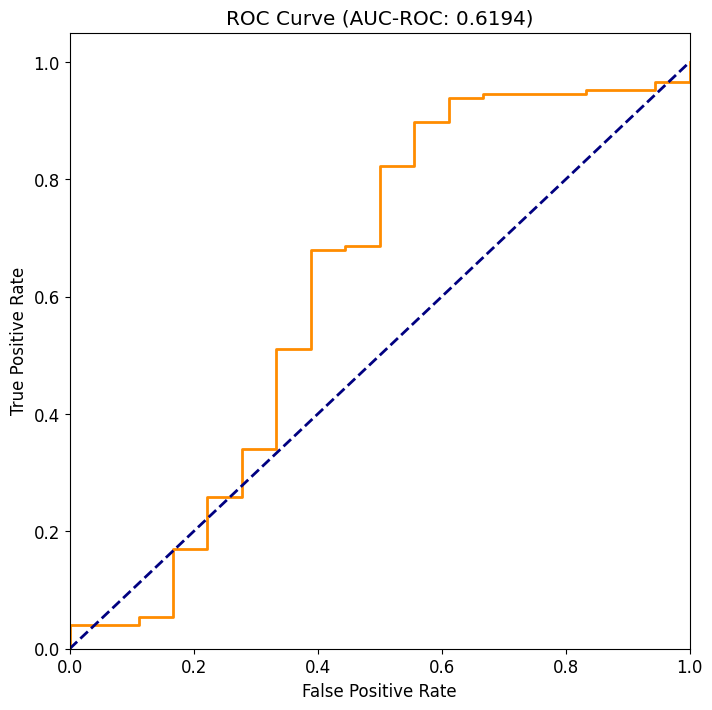

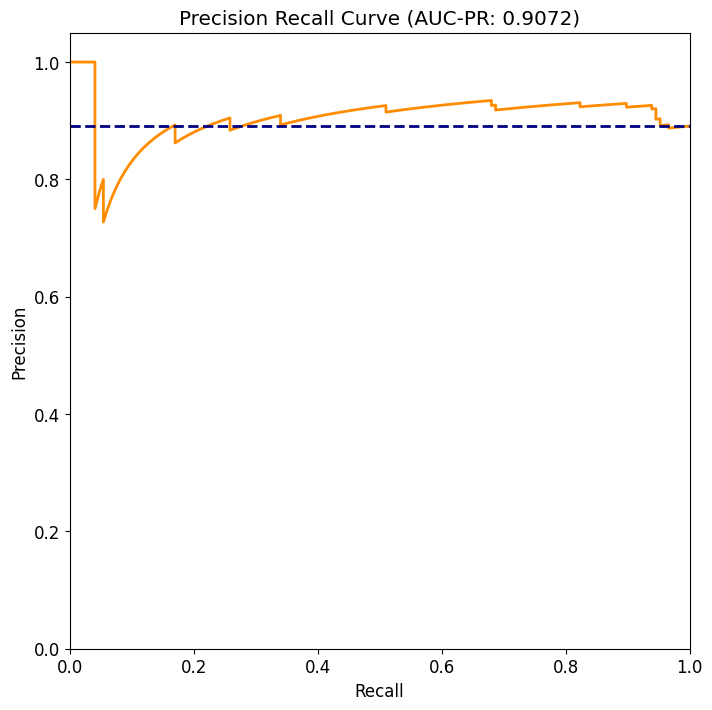

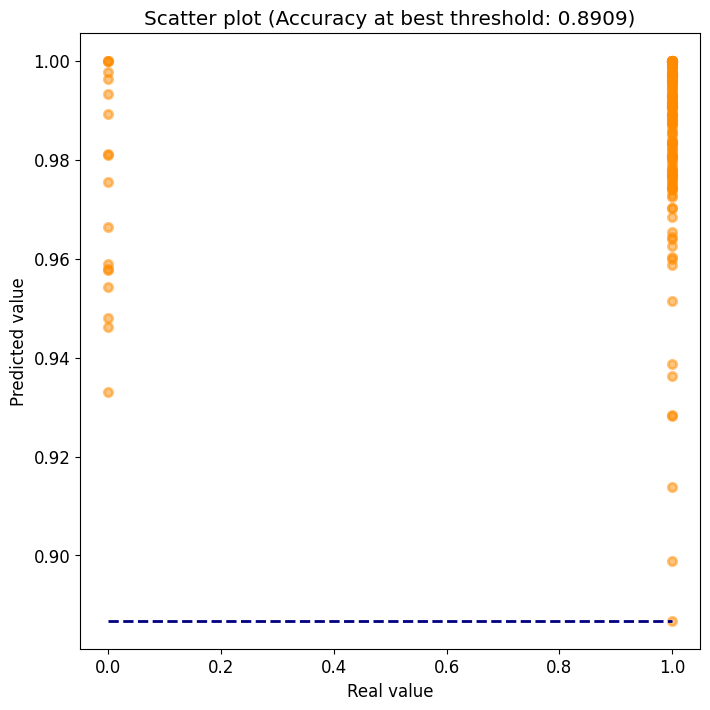

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12


# compute AUC-ROC and ROC curve
auc_roc = roc_auc_score(target, preds)
fpr, tpr, ths = roc_curve(target, preds)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC-ROC: {:.4f})".format(auc_roc))
plt.show()

# Compute AUC-PR
auc_pr = average_precision_score(target, preds)
prec, recall, ths = precision_recall_curve(target, preds)

plt.figure()
lw = 2
plt.plot(recall, prec, color="darkorange", lw=lw)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve (AUC-PR: {:.4f})".format(auc_pr))
plt.show()

# Compute ACC and threshold
best_acc = 0
best_th = 0
for th in ths:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th

plt.figure()
plt.scatter(target, preds, alpha=0.5, color="darkorange", lw=lw)
plt.plot([0, 1], [best_th, best_th], color='navy', lw=lw, linestyle='--')
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Scatter plot (Accuracy at best threshold: {:.4f})".format(best_acc))
plt.show()

Comments:
* improvement on ROC-AUC but decrease in PR-AUC